<a href="https://colab.research.google.com/github/Manoj250/Object-Detection-With-Selective-Search-For-Region-Of-Proposal/blob/main/Object_Detection_With_Selective_Search_For_Region_Of_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
import numpy as np
import cv2

In [180]:
def selective_search(image, method="fast"):
	ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
	ss.setBaseImage(image)
	if method == "fast":
		ss.switchToSelectiveSearchFast()
	else:
		ss.switchToSelectiveSearchQuality()
	rects = ss.process()
	return rects

In [181]:
model = ResNet50(weights="imagenet")

In [182]:
pip install wget

In [183]:
import wget
wget.download("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HNZlD0ItXF10C4ADBBQbKwHaJu%26pid%3DApi&f=1","dog.jpg")

'dog.jpg'

Text(0.5, 1.0, '(622, 474, 3)')

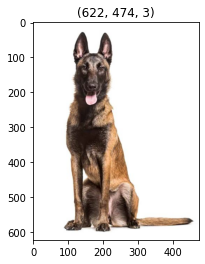

In [184]:
from PIL import Image
import matplotlib.pyplot as plt

image = np.asarray(Image.open("dog.jpg"))
plt.imshow(image)
plt.title(str(image.shape))

In [185]:
rects = selective_search(image)

proposals = []
boxes = []

(-0.5, 473.5, 621.5, -0.5)

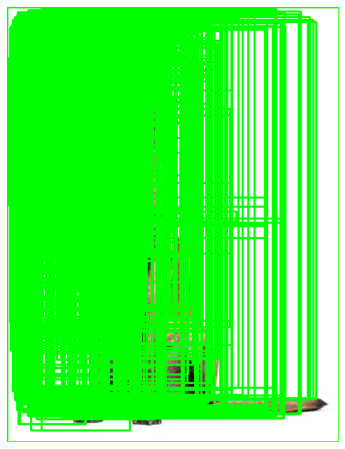

In [186]:
all_rects = image.copy()
for (x, y, w, h) in rects:
  cv2.rectangle(all_rects, (x,y), (w,h),(0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(all_rects)
plt.axis("off")

In [187]:
for (x, y, w, h) in rects:
  if w / float(image.shape[1]) < 0.1 or h / float(image.shape[0]) < 0.1:
	  continue
  roi = image[y:y + h, x:x + w]
  roi = cv2.resize(roi, (224, 224))
  roi = np.asarray(roi)
  roi = preprocess_input(roi)
  proposals.append(roi)
  boxes.append((x, y, w, h))

In [188]:
proposals = np.array(proposals)
preds = model.predict(proposals)
preds = imagenet_utils.decode_predictions(preds, top=1)
labels = {}

In [189]:
labelFilters = ["malinois"]

In [190]:
for i,p in enumerate(preds):
	(imagenetID, label, prob) = p[0]

	if labelFilters is not None and label not in labelFilters:
		continue

	if prob >= 0.90:
		(x, y, w, h) = boxes[i]
		box = (x, y, x + w, y + h)
  
		L = labels.get(label, [])
		L.append((box, prob))
		labels[label] = L

In [191]:
labels.keys()

dict_keys(['malinois'])

In [192]:
for label in labels.keys():
	boxes = np.array([p[0] for p in labels[label]])
	proba = np.array([p[1] for p in labels[label]])

	boxes = non_max_suppression(boxes, proba)

	for (x1, y1, width, height) in boxes:
		cv2.rectangle(image, (x1,y1), (width,height),(0, 255, 0), 2)
		y = y1 - 10 if y1 - 10 > 10 else y1 + 10
		cv2.putText(image, label, (x1, y1),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

(-0.5, 473.5, 621.5, -0.5)

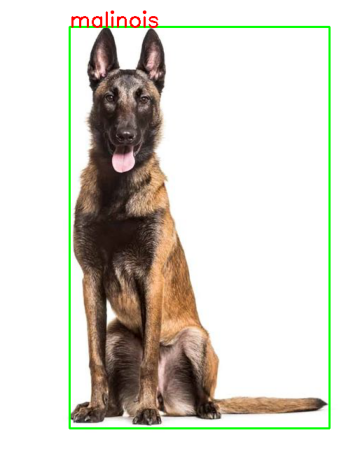

In [193]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis("off")